In [1]:
from keras.datasets import imdb

## data preparation

In [1]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 8s 0us/step


- train_data and test_data是由单词索引组成的列表，而对应的label是0和1，分别表示负面和正面评价

In [24]:
print("train data size is ", train_data.shape, ", and the first comment label is ", 
      train_labels[0], ", and the first sample is ", train_data[0])

train data size is  (25000,) , and the first comment label is  1 , and the first sample is  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103,

In [13]:
word_dict = imdb.get_word_index()
reverse_word_dict = dict([(value, key) for (key, value) in word_dict.items()])
decoded_review = ' '.join(reverse_word_dict.get(i-3, '?') for i in train_data[0])
print("decoded comment for train_data[0] is \n", decoded_review)

decoded comment for train_data[0] is 
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praise

In [22]:
import numpy as np
# convert sequences into one-hot format
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i,sequence] = 1.
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape, x_test.shape)
print(x_train[0])

(25000, 10000) (25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train, y_test)

[1. 0. 0. ... 0. 1. 0.] [0. 1. 1. ... 0. 0. 0.]


## network build

In [27]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## reserve validate dataset

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## model fit data

In [31]:
# 每次训练用512个样本组成的小批量SGD，训练20轮，每轮训练完成后在x_val和y_val组成的验证集上监控精度和损失
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 284us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

### draw model fit history

In [32]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


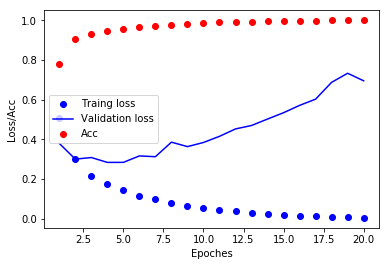

In [41]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
epoches = range(1, len(validation_loss_values) + 1)
acc = history_dict['acc']
plt.plot(epoches, loss_values, 'bo', label='Traing loss')
plt.plot(epoches, validation_loss_values, 'b', label = 'Validation loss')
plt.plot(epoches, acc, 'ro', label = 'Acc')
plt.xlabel('Epoches')
plt.ylabel('Loss/Acc')
plt.legend()
plt.show()

- 从训练阶段的validation loss上可以看到，在第4轮之后，validation_set上的loss就呈上升趋势了，因此在训练阶段的3轮以后就呈现了对训练集进行过拟合的趋势。因此，我们重新训练一个model，只训练4轮看效果。

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.4470 - acc: 0.8242
Epoch 2/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.2557 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.1969 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 6s 237us/step


In [44]:
print(result)

[0.3179983378505707, 0.87512]


In [45]:
model.predict(x_test)

array([[0.29397106],
       [0.99968123],
       [0.93757635],
       ...,
       [0.16675377],
       [0.15830684],
       [0.7685168 ]], dtype=float32)

- 尝试使用三个隐藏层试试看,结论是基本没什么变化，本身还和权重的随机初始值有关

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 148us/step - loss: 0.4585 - acc: 0.8158
Epoch 2/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.2519 - acc: 0.9110
Epoch 3/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.1953 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 6s 256us/step


In [49]:
print(result)

[0.33466789452075957, 0.87108]
